In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense ,Flatten,Input

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [5]:
in_layer=Input(shape=(28,28))
inputs=Flatten()(in_layer)
D1=Dense(100,activation="sigmoid",name="L1")(inputs)
D2=Dense(50,activation="sigmoid",name="L2")(D1)
D3=Dense(30,activation="sigmoid",name="L3")(D2)
out=Dense(10,activation="softmax",name="output")(D3)
model=Model(inputs=in_layer,outputs=out)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
L1 (Dense)                   (None, 100)               78500     
_________________________________________________________________
L2 (Dense)                   (None, 50)                5050      
_________________________________________________________________
L3 (Dense)                   (None, 30)                1530      
_________________________________________________________________
output (Dense)               (None, 10)                310       
Total params: 85,390
Trainable params: 85,390
Non-trainable params: 0
_________________________________________________________

In [7]:
from tensorflow.keras.datasets import mnist

In [8]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
model.compile(optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [11]:
y_train_hot=OneHotEncoder().fit_transform(y_train.reshape(-1,1)).todense()

In [12]:
output=model.fit(x_train,y_train_hot,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.9180 - accuracy: 0.7463
Epoch 2/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4870 - accuracy: 0.8541
Epoch 3/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4003 - accuracy: 0.8784
Epoch 4/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3543 - accuracy: 0.8911
Epoch 5/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3216 - accuracy: 0.9001
Epoch 6/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3101 - accuracy: 0.9040
Epoch 7/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2984 - accuracy: 0.9069
Epoch 8/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2739 - accuracy: 0.9159
Epoch 9/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2690 - accuracy: 0.9161
Epoch 10/10
60

In [13]:
y_test_hot=OneHotEncoder().fit_transform(y_test.reshape(-1,1)).todense()

In [14]:
model.evaluate(x_test,y_test_hot,verbose=0)

[0.2519285999536514, 0.9212]

(0, 1)

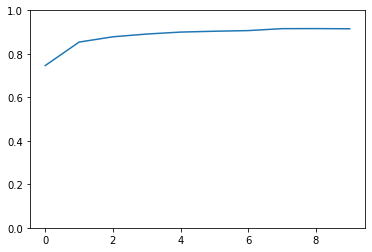

In [15]:
plt.plot(output.history["accuracy"])
plt.ylim(0,1)

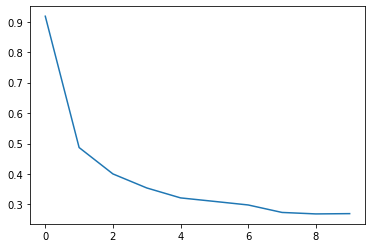

In [16]:
plt.plot(output.history["loss"])

In [17]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [18]:
x_test.shape

(10000, 28, 28)

In [19]:
model.predict(x_test[:10]).argmax(axis=1)

array([7, 2, 1, 0, 4, 1, 4, 4, 4, 9], dtype=int64)

In [20]:
from PIL import Image

In [35]:
data=Image.open("../thirtyfive/datasets/nums/two.jpeg")

In [36]:
#image=np.array(data)

In [37]:
img=data.resize(size=(28,28))

image=255-np.array(img).mean(axis=2)

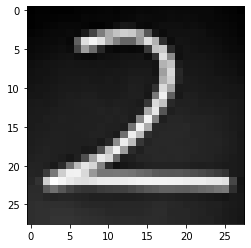

In [41]:
plt.imshow(image,cmap="gray")

In [40]:
model.predict(np.array([image])).argmax(axis=1)

array([2], dtype=int64)